In [1]:
using Pkg
Pkg.activate("/media/mat/HDD/AdaptiveTransportMap/")

 Activating environment at `/media/mat/HDD/AdaptiveTransportMap/Project.toml`


In [2]:
using Revise
using LinearAlgebra
using AdaptiveTransportMap
using Statistics
using Distributions
using Test
using ForwardDiff
using SpecialFunctions
using OrthoMatchingPursuit
using BenchmarkTools
using MultivariateStats

┌ Info: Precompiling AdaptiveTransportMap [bdf749b0-1400-4207-80d3-e689c0e3f03d]
└ @ Base loading.jl:1278
┌ Warning: Type annotations on keyword arguments not currently supported in recipes. Type information has been discarded
└ @ RecipesBase ~/.julia/packages/RecipesBase/92zOw/src/RecipesBase.jl:116
┌ Warning: Type annotations on keyword arguments not currently supported in recipes. Type information has been discarded
└ @ RecipesBase ~/.julia/packages/RecipesBase/92zOw/src/RecipesBase.jl:116
┌ Warning: Type annotations on keyword arguments not currently supported in recipes. Type information has been discarded
└ @ RecipesBase ~/.julia/packages/RecipesBase/92zOw/src/RecipesBase.jl:116
┌ Warning: Type annotations on keyword arguments not currently supported in recipes. Type information has been discarded
└ @ RecipesBase ~/.julia/packages/RecipesBase/92zOw/src/RecipesBase.jl:116
┌ Warning: Type annotations on keyword arguments not currently supported in recipes. Type information has been

In [3]:
using Plots
default(tickfont = font("CMU Serif", 9), 
        titlefont = font("CMU Serif", 14), 
        guidefont = font("CMU Serif", 12),
        legendfont = font("CMU Serif", 10),
        grid = false)
# Plots.font("sans-serif")
# clibrary(:colorbrewer)
# gr()
pyplot()

using LaTeXStrings
# PyPlot.rc("text", usetex = "true")
# rcParams = PyPlot.PyDict(PyPlot.matplotlib."rcParams")
# rcParams["text.usetex"] = true;
PyPlot.rc("font", family = "CMU Serif")
PyPlot.matplotlib[:rc]("mathtext",fontset="cm")        #computer modern font 
PyPlot.matplotlib[:rc]("font",family="serif",size=12)

### Working from samples

In [30]:
Nx = 40
Ny = 40
Ne = 10000
H = I

maxrank = min(Nx, Ny)

Σx = zeros(Nx, Nx)
for i=1:Nx
    for j=1:i
        Σij = 0.9^(abs(i-j))
        Σx[i,j] = Σij
        Σx[j,i] = Σij
    end
end

Σx = Symmetric(Σx)

40×40 Symmetric{Float64,Array{Float64,2}}:
 1.0        0.9        0.81       …  0.0202756  0.018248   0.0164232
 0.9        1.0        0.9           0.0225284  0.0202756  0.018248
 0.81       0.9        1.0           0.0250316  0.0225284  0.0202756
 0.729      0.81       0.9           0.0278128  0.0250316  0.0225284
 0.6561     0.729      0.81          0.0309032  0.0278128  0.0250316
 0.59049    0.6561     0.729      …  0.0343368  0.0309032  0.0278128
 0.531441   0.59049    0.6561        0.038152   0.0343368  0.0309032
 0.478297   0.531441   0.59049       0.0423912  0.038152   0.0343368
 0.430467   0.478297   0.531441      0.0471013  0.0423912  0.038152
 0.38742    0.430467   0.478297      0.0523348  0.0471013  0.0423912
 0.348678   0.38742    0.430467   …  0.0581497  0.0523348  0.0471013
 0.313811   0.348678   0.38742       0.0646108  0.0581497  0.0523348
 0.28243    0.313811   0.348678      0.0717898  0.0646108  0.0581497
 ⋮                                ⋱                        
 0

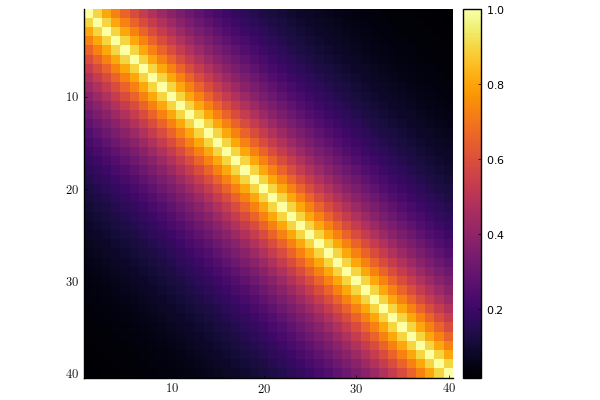

In [31]:
heatmap(Σx, ratio = 1, yflip = true)

In [32]:
σy = 1.0
Σy = Diagonal(ones(Ny))
ϵy = AdditiveInflation(zeros(Ny), σy)

ϵx = AdditiveInflation(Nx, zeros(Nx), Matrix(Σx))

AdditiveInflation(40, [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [1.0 0.9 … 0.01824800363140075 0.016423203268260675; 0.9 1.0 … 0.020275559590445275 0.01824800363140075; … ; 0.01824800363140075 0.020275559590445275 … 1.0 0.9; 0.016423203268260675 0.01824800363140075 … 0.9 1.0], [0.7597588770641046 0.4159500617125577 … 0.0017556515487273051 0.001575093111640993; 0.4159500617125577 0.6821005260537251 … 0.001956959198176979 0.0017556515487276924; … ; 0.0017556515487273051 0.001956959198176979 … 0.682100526053729 0.41595006171255644; 0.001575093111640993 0.0017556515487276924 … 0.41595006171255644 0.7597588770641052])

In [33]:
X = zeros(Ny+Nx, Ne)

# Samples from the standard normal distribution
ϵx(X, Ny+1, Ny+Nx)

# Compute observations
observe((x, t)->H*x, X, 0.0, Ny, Nx)

ϵ = ϵy.m .+ ϵy.σ*randn(Ny, Ne)

40×10000 Array{Float64,2}:
 -1.32844    -1.99285    2.12087     …   1.40022     0.825213    0.233962
 -1.71947     1.50848   -0.239555       -1.53707     0.183144    1.33193
  0.908365   -0.520934  -1.03834         0.977022    0.361359   -1.73129
  1.23666    -1.00555    1.10617         0.41664    -0.53976    -1.10864
 -0.105757   -0.645611   1.03503         1.16779     0.380369   -0.373103
  1.15068     1.09956   -0.240606    …  -1.15499     1.26481    -0.239563
 -0.647357    2.16838    2.05328        -1.09722     0.931478   -1.22365
 -0.254278   -0.689229   2.02254        -0.258525    0.127596    1.78359
  0.460902   -1.93396   -0.00577106     -0.220024   -1.89345     2.40092
  0.0385513  -0.901323  -1.16171         1.0601      1.79268     0.436348
  0.189654   -0.553421   1.47385     …   0.0394934  -0.0218377   1.28963
  1.33168    -1.15874   -0.264788       -0.314631    0.085489    0.846747
  0.372856    0.556625  -1.08113         0.26575     1.93964    -1.44093
  ⋮                

In [34]:
Σxx = Symmetric(cov(state(X, Ny, Nx)'))
Σxy = 1/(Ne-1)*(state(X, Ny, Nx) .- mean(state(X,Ny,Nx);dims = 2)[:,1])*(meas(X, Ny, Nx) .- mean(meas(X,Ny,Nx);dims = 2)[:,1])'
Σyy = Symmetric(cov(meas(X, Ny, Nx)'))

40×40 Symmetric{Float64,Array{Float64,2}}:
 1.00487    0.900625   0.810377   …  0.0317039  0.0301     0.0275577
 0.900625   1.00326    0.898476      0.0327951  0.0324039  0.0305549
 0.810377   0.898476   0.997895      0.029098   0.0295725  0.0288154
 0.728944   0.809461   0.897303      0.0308373  0.0303364  0.0305144
 0.662327   0.733274   0.810885      0.0287647  0.0272881  0.0269451
 0.600147   0.661513   0.726949   …  0.0278716  0.0292429  0.0306245
 0.541961   0.600064   0.660633      0.0284878  0.0316005  0.0286012
 0.48818    0.540647   0.592368      0.0330153  0.0358154  0.0293395
 0.444006   0.493724   0.541419      0.0386064  0.0414979  0.0357992
 0.397055   0.44293    0.487618      0.037672   0.0404689  0.0341287
 0.35295    0.395127   0.433083   …  0.0460389  0.0472585  0.0389502
 0.31344    0.353516   0.388471      0.0515028  0.0513983  0.0429147
 0.280532   0.317351   0.351218      0.0630396  0.0636498  0.0555183
 ⋮                                ⋱                        


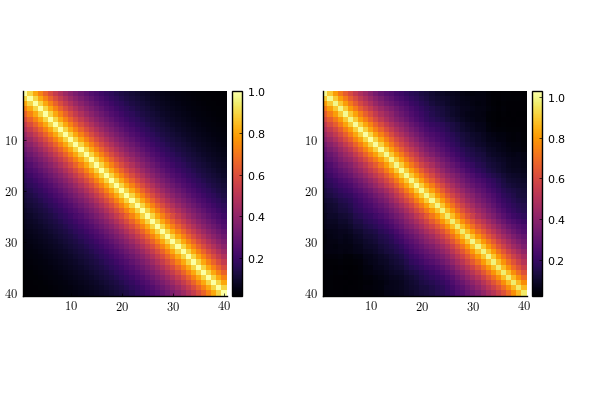

In [35]:
plt = plot(layout = grid(1,2))
heatmap!(plt[1,1], Σx, ratio = 1.0, yflip = true)
heatmap!(plt[1,2], Σxx, ratio = 1.0, yflip = true)

In [ ]:
errorΣx = Float64[]

In [37]:
norm(Σx-Σxx)/norm(Σx)

0.02885502761361545

In [40]:
errorΣx = Float64[]
Ne_tab = [10;20;30;40;50;70;80;100;120;140;160;180;200; 300; 400;500;600;1000;2000;5000;10000]
for i in Ne_tab
    X = zeros(Nx, i)
    ϵx(X, 1, Nx)
    Σxx = Symmetric(cov(X'))
    push!(errorΣx, norm(Σx-Σxx)/norm(Σx))
end


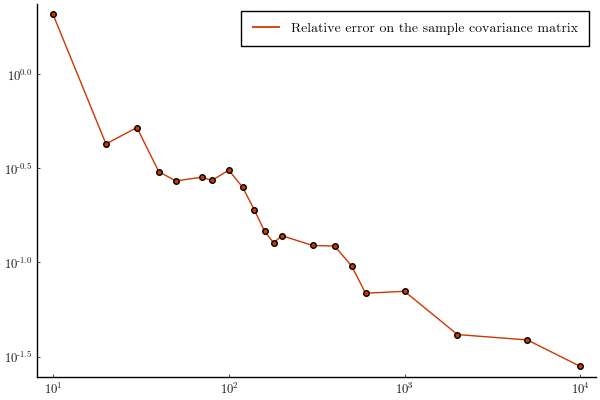

In [52]:
plot(Ne_tab, errorΣx, xscale = :log10, yscale = :log10, 
     label = "Relative error on the sample covariance matrix", color = :orangered3)
scatter!(Ne_tab, errorΣx, xscale = :log10, yscale = :log10, label= "", color = :orangered3)